In [343]:
# Import statements
import numpy as np
import pandas as pd

In [344]:
# Import for data visualizations, relevant models
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay,accuracy_score,classification_report

1. EDA

In [345]:
# Load the dataset
df = pd.read_csv('../dataset/canadian_yield_and_agroclimate.csv')

In [346]:
# Display the first few rows of the dataframe
df.head()

,Unnamed: 0,CROP,LATITUDE,LONGITUDE,YEAR,YIELD,GSL,CWD_fall,CWD_spring,CWD_summer,...,CSDI_summer,WSDI_fall,WSDI_spring,WSDI_summer,CFD_fall,CFD_spring,CFD_summer,CSU_fall,CSU_spring,CSU_summer
0,0,barley,46.25,-62.25,1987,59.1,192.0,5.0,7.0,4.0,...,0.0,0.0,7.0,0.0,9.0,23.0,0.0,1.0,0.0,5.0
1,1,oats,46.25,-62.25,1987,62.1,192.0,5.0,7.0,4.0,...,0.0,0.0,7.0,0.0,9.0,23.0,0.0,1.0,0.0,5.0
2,2,spring_wheat,46.25,-62.25,1987,52.2,192.0,5.0,7.0,4.0,...,0.0,0.0,7.0,0.0,9.0,23.0,0.0,1.0,0.0,5.0
3,3,winter_wheat,46.25,-62.25,1987,52.5,192.0,5.0,7.0,4.0,...,0.0,0.0,7.0,0.0,9.0,23.0,0.0,1.0,0.0,5.0
4,4,barley,46.25,-63.25,1987,59.1,193.0,5.0,8.0,4.0,...,0.0,0.0,7.0,0.0,10.0,23.0,0.0,0.0,0.0,8.0


In [347]:
# Get a concise summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12363 entries, 0 to 12362
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   12363 non-null  int64  
 1   CROP         12363 non-null  object 
 2   LATITUDE     12363 non-null  float64
 3   LONGITUDE    12363 non-null  float64
 4   YEAR         12363 non-null  int64  
 5   YIELD        12363 non-null  float64
 6   GSL          12363 non-null  float64
 7   CWD_fall     12363 non-null  float64
 8   CWD_spring   12363 non-null  float64
 9   CWD_summer   12363 non-null  float64
 10  WW_fall      12363 non-null  float64
 11  WW_spring    12363 non-null  float64
 12  WW_summer    12363 non-null  float64
 13  CDD_fall     12363 non-null  float64
 14  CDD_spring   12363 non-null  float64
 15  CDD_summer   12363 non-null  float64
 16  CSDI_fall    12363 non-null  float64
 17  CSDI_spring  12363 non-null  float64
 18  CSDI_summer  12363 non-null  float64
 19  WSDI

In [348]:
# Statistical summary of numeric columns
df.describe()

,Unnamed: 0,LATITUDE,LONGITUDE,YEAR,YIELD,GSL,CWD_fall,CWD_spring,CWD_summer,WW_fall,...,CSDI_summer,WSDI_fall,WSDI_spring,WSDI_summer,CFD_fall,CFD_spring,CFD_summer,CSU_fall,CSU_spring,CSU_summer
count,12363.000000,12363.000000,12363.000000,12363.000000,12363.000000,12363.000000,12363.000000,12363.000000,12363.000000,12363.000000,...,12363.000000,12363.000000,12363.000000,12363.000000,12363.000000,12363.000000,12363.000000,12363.000000,12363.000000,12363.000000
mean,6181.000000,49.808966,-95.359561,1998.579956,167.603850,177.347246,5.246461,5.928658,6.635687,2.805549,...,0.048936,0.934644,2.567014,1.156920,22.288037,32.445118,0.525277,2.499636,2.548896,11.443905
std,3569.035024,3.257184,18.317775,6.875589,323.767494,26.228786,4.815795,3.515251,3.992360,3.134639,...,0.554678,2.700632,4.800225,3.495734,10.390037,15.992216,1.216589,2.378052,2.439814,9.282354
min,0.000000,42.750000,-130.250000,1987.000000,2.000000,47.000000,1.000000,1.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,3090.500000,46.750000,-108.750000,1993.000000,32.500000,161.000000,3.000000,4.000000,4.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,14.000000,19.000000,0.000000,1.000000,0.000000,5.000000
50%,6181.000000,49.750000,-100.250000,1999.000000,45.300000,181.000000,4.000000,5.000000,6.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,22.000000,29.000000,0.000000,2.000000,2.000000,9.000000
75%,9271.500000,51.250000,-76.250000,2004.000000,68.000000,197.000000,6.000000,7.000000,8.000000,5.000000,...,0.000000,0.000000,6.000000,0.000000,29.000000,45.000000,1.000000,4.000000,4.000000,14.000000
max,12362.000000,57.750000,-60.750000,2010.000000,2110.000000,253.000000,66.000000,37.000000,43.000000,20.000000,...,7.000000,16.000000,32.000000,30.000000,62.000000,87.000000,12.000000,14.000000,12.000000,77.000000


In [349]:
# Summary of categorical data
df.describe(include='object')

,CROP
count,12363
unique,14
top,spring_wheat
freq,1546


In [350]:
# Check missing parts in the dataset (null)
df.isnull().sum()

Unnamed: 0     0
CROP           0
LATITUDE       0
LONGITUDE      0
YEAR           0
YIELD          0
GSL            0
CWD_fall       0
CWD_spring     0
CWD_summer     0
WW_fall        0
WW_spring      0
WW_summer      0
CDD_fall       0
CDD_spring     0
CDD_summer     0
CSDI_fall      0
CSDI_spring    0
CSDI_summer    0
WSDI_fall      0
WSDI_spring    0
WSDI_summer    0
CFD_fall       0
CFD_spring     0
CFD_summer     0
CSU_fall       0
CSU_spring     0
CSU_summer     0
dtype: int64

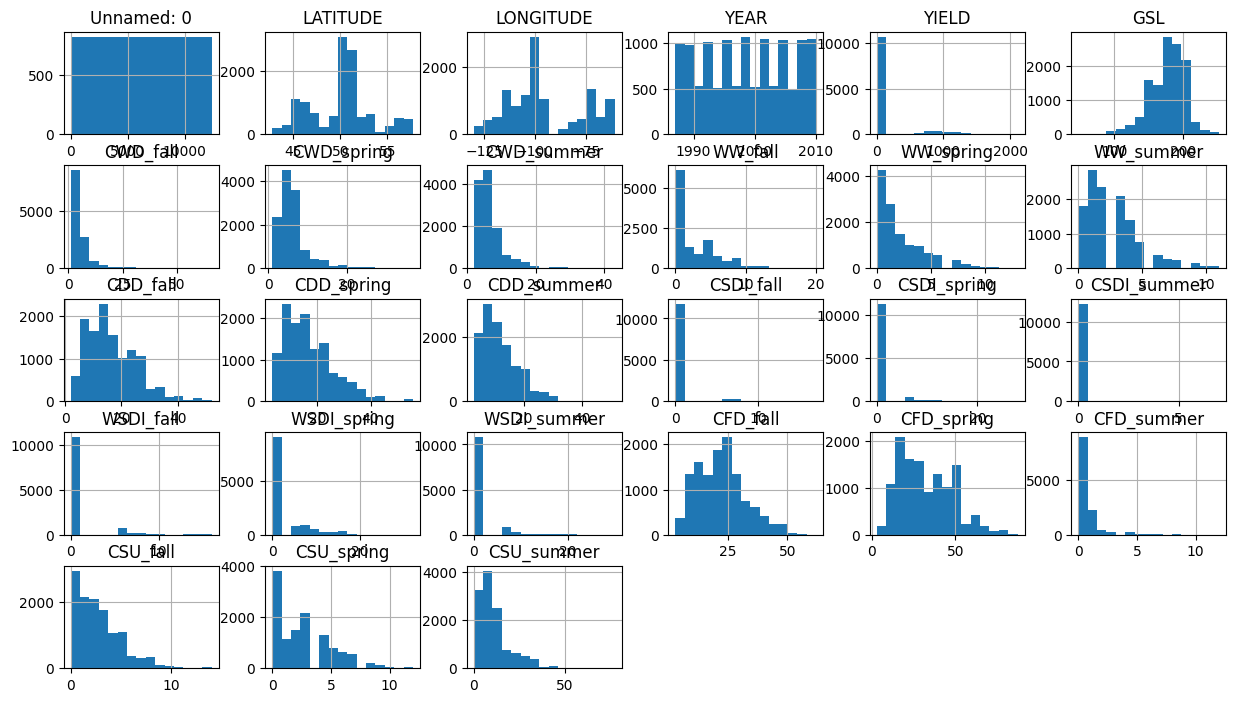

In [351]:
# Distribution of numerical features
df.hist(bins=15, figsize=(15, 10), layout=(6, 6))
plt.show()

C:\Users\clara\AppData\Local\Temp\ipykernel_31708\1038509432.py:15: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()  # Adjust subplots to fit into the figure area.


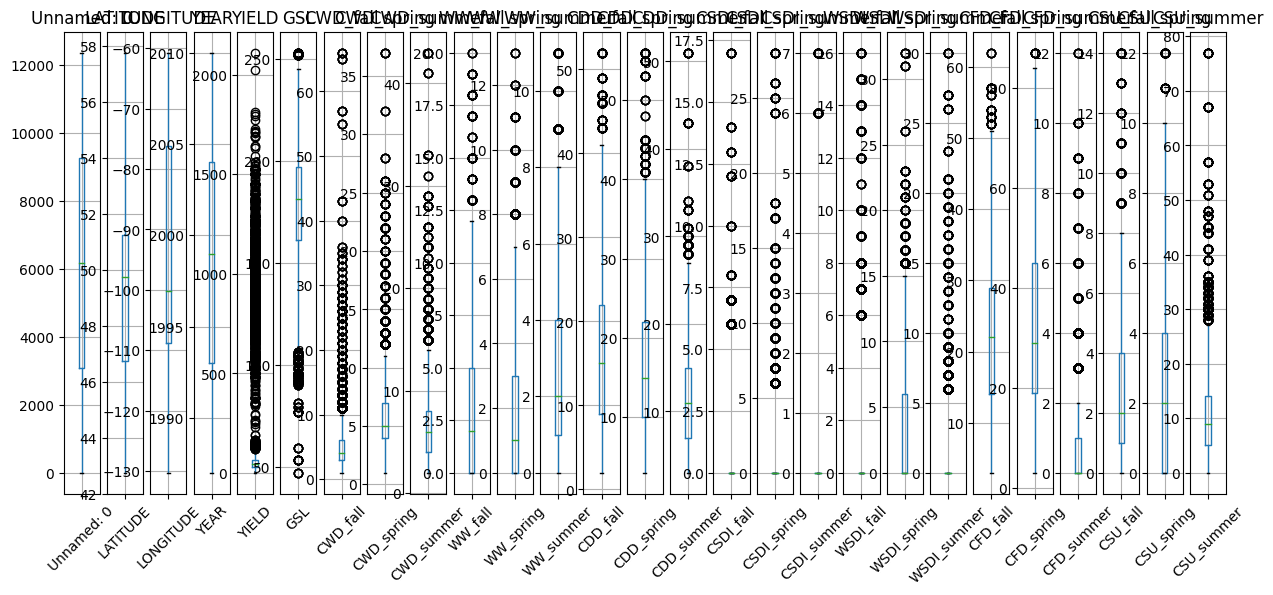

In [352]:
# Box plots for numerical columns to check for outliers
# Select numerical columns
num_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Set the figure size and create subplots
plt.figure(figsize=(15, 6))

# Create a boxplot for each numerical column
for i, col in enumerate(num_columns):
    plt.subplot(1, len(num_columns), i+1)
    df.boxplot(column=col)
    plt.title(col)
    plt.xticks(rotation=45)

plt.tight_layout()  # Adjust subplots to fit into the figure area.
plt.show()

In [353]:
# Print crop types
unique_values = df['CROP'].unique()
print(unique_values)

['barley' 'oats' 'spring_wheat' 'winter_wheat' 'corn' 'soybeans' 'canola'
 'fall_rye' 'canary_seed' 'durum_wheat' 'flaxseed' 'lentils' 'mustard'
 'peas']


2. Preprocessing for Input and Output

<p> To make it a classification, I grouped by latitudes and longitudes and deleted rows except where crop yield is max</p>

In [354]:
# Group by then find the row with max 'YIELD' within each group
# Calculate the 75th percentile value for the 'YIELD' column
def filter_top_75th_percentile(group):
    percentile_75 = group['YIELD'].quantile(0.9)  # Calculate the 75th percentile for the group
    return group[group['YIELD'] >= percentile_75]  # Return rows where 'YIELD' is in the top 75th percentile

# Group by 'CROP_TYPE', apply the filtering function, and concatenate the results back together
top_75th_percentile_df = df.groupby('CROP').apply(filter_top_75th_percentile).reset_index(drop=True)

# If you really want to drop the 'YIELD' column
df_max_yield = top_75th_percentile_df.drop(columns='YIELD')

# top_75th_percentile_df_without_yield
# idx = df.groupby(['LATITUDE', 'LONGITUDE', 'YEAR'])['YIELD'].transform(max) == df['YIELD']
# df_max_yield = df[idx]

In [355]:
entries_per_crop_type = df_max_yield.groupby('CROP').size()

# Convert to DataFrame for a nicer display, if needed
entries_per_crop_type_df = entries_per_crop_type.reset_index(name='COUNT')

# Display the result
print(entries_per_crop_type_df)

            CROP  COUNT
0         barley    136
1    canary_seed     65
2         canola    115
3           corn     91
4    durum_wheat     69
5       fall_rye    103
6       flaxseed     61
7        lentils     49
8        mustard     68
9           oats    138
10          peas     70
11      soybeans     34
12  spring_wheat    179
13  winter_wheat    124


In [356]:
df.head()

,Unnamed: 0,CROP,LATITUDE,LONGITUDE,YEAR,YIELD,GSL,CWD_fall,CWD_spring,CWD_summer,...,CSDI_summer,WSDI_fall,WSDI_spring,WSDI_summer,CFD_fall,CFD_spring,CFD_summer,CSU_fall,CSU_spring,CSU_summer
0,0,barley,46.25,-62.25,1987,59.1,192.0,5.0,7.0,4.0,...,0.0,0.0,7.0,0.0,9.0,23.0,0.0,1.0,0.0,5.0
1,1,oats,46.25,-62.25,1987,62.1,192.0,5.0,7.0,4.0,...,0.0,0.0,7.0,0.0,9.0,23.0,0.0,1.0,0.0,5.0
2,2,spring_wheat,46.25,-62.25,1987,52.2,192.0,5.0,7.0,4.0,...,0.0,0.0,7.0,0.0,9.0,23.0,0.0,1.0,0.0,5.0
3,3,winter_wheat,46.25,-62.25,1987,52.5,192.0,5.0,7.0,4.0,...,0.0,0.0,7.0,0.0,9.0,23.0,0.0,1.0,0.0,5.0
4,4,barley,46.25,-63.25,1987,59.1,193.0,5.0,8.0,4.0,...,0.0,0.0,7.0,0.0,10.0,23.0,0.0,0.0,0.0,8.0


In [357]:
df_max_yield.columns

Index(['Unnamed: 0', 'CROP', 'LATITUDE', 'LONGITUDE', 'YEAR', 'GSL',
       'CWD_fall', 'CWD_spring', 'CWD_summer', 'WW_fall', 'WW_spring',
       'WW_summer', 'CDD_fall', 'CDD_spring', 'CDD_summer', 'CSDI_fall',
       'CSDI_spring', 'CSDI_summer', 'WSDI_fall', 'WSDI_spring', 'WSDI_summer',
       'CFD_fall', 'CFD_spring', 'CFD_summer', 'CSU_fall', 'CSU_spring',
       'CSU_summer'],
      dtype='object')

In [358]:
# Scale numeric values
from sklearn.preprocessing import StandardScaler

# Copying original dataframe
df_max_yield_ready = df_max_yield.copy()

scaler = StandardScaler()
# all numeric columns except yield
num_cols = ['LATITUDE', 'LONGITUDE', 'YEAR','GSL',
       'CWD_fall', 'CWD_spring', 'CWD_summer', 'WW_fall', 'WW_spring',
       'WW_summer', 'CDD_fall', 'CDD_spring', 'CDD_summer', 'CSDI_fall',
       'CSDI_spring', 'CSDI_summer', 'WSDI_fall', 'WSDI_spring', 'WSDI_summer',
       'CFD_fall', 'CFD_spring', 'CFD_summer', 'CSU_fall', 'CSU_spring',
       'CSU_summer']
df_max_yield_ready[num_cols] = scaler.fit_transform(df_max_yield_ready[num_cols])

df_max_yield_ready.head()

,Unnamed: 0,CROP,LATITUDE,LONGITUDE,YEAR,GSL,CWD_fall,CWD_spring,CWD_summer,WW_fall,...,CSDI_summer,WSDI_fall,WSDI_spring,WSDI_summer,CFD_fall,CFD_spring,CFD_summer,CSU_fall,CSU_spring,CSU_summer
0,922,barley,0.893616,-1.114996,-1.888829,0.696806,-0.354321,1.104756,2.361642,-0.599655,...,-0.078628,-0.356843,0.614263,-0.314712,0.604972,-0.023413,-0.411604,0.113331,-0.978960,-1.061449
1,988,barley,-0.910672,1.685656,-1.742792,0.839927,0.869355,-0.665791,0.025124,2.859585,...,-0.078628,-0.356843,-0.603044,-0.314712,-1.165290,0.413852,-0.411604,-1.057757,-0.978960,-0.948660
2,992,barley,-0.910672,1.632310,-1.742792,0.839927,-0.109586,-0.665791,0.544350,2.859585,...,-0.078628,-0.356843,-0.603044,-0.314712,-1.072118,0.413852,-0.411604,-1.057757,-0.564184,-0.948660
3,996,barley,-0.771880,1.605637,-1.742792,0.839927,0.135149,-0.665791,0.025124,2.167737,...,-0.078628,-0.356843,-0.603044,-0.314712,-1.072118,0.413852,-0.411604,-1.057757,-0.564184,-0.948660
4,1107,barley,-1.188254,0.938815,-1.742792,0.696806,0.135149,0.396537,0.025124,-0.945579,...,-0.078628,-0.356843,-0.603044,-0.314712,-0.792603,0.288919,-0.411604,0.113331,-0.149408,-0.271924


In [359]:
# Set input and output
from sklearn.preprocessing import label_binarize

# Input as X
X = df_max_yield_ready[['LATITUDE', 'LONGITUDE', 'YEAR','GSL',
       'CWD_fall', 'CWD_spring', 'CWD_summer', 'WW_fall', 'WW_spring',
       'WW_summer', 'CDD_fall', 'CDD_spring', 'CDD_summer', 'CSDI_fall',
       'CSDI_spring', 'CSDI_summer', 'WSDI_fall', 'WSDI_spring', 'WSDI_summer',
       'CFD_fall', 'CFD_spring', 'CFD_summer', 'CSU_fall', 'CSU_spring',
       'CSU_summer']]

# Output as Y
y = df_max_yield_ready['CROP']

In [360]:
features = df_max_yield_ready[['LATITUDE', 'LONGITUDE', 'YEAR','GSL',
       'CWD_fall', 'CWD_spring', 'CWD_summer', 'WW_fall', 'WW_spring',
       'WW_summer', 'CDD_fall', 'CDD_spring', 'CDD_summer', 'CSDI_fall',
       'CSDI_spring', 'CSDI_summer', 'WSDI_fall', 'WSDI_spring', 'WSDI_summer',
       'CFD_fall', 'CFD_spring', 'CFD_summer', 'CSU_fall', 'CSU_spring',
       'CSU_summer']]

labels = df_max_yield_ready['CROP']
target = df_max_yield_ready['CROP']

In [361]:
# Train and Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X , y,
                                                    shuffle = True,
                                                    test_size=0.2,
                                                    random_state=1)

# Show the Training and Testing Data
print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of training label:', y_test.shape)

Shape of training feature: (1041, 25)
Shape of testing feature: (261, 25)
Shape of training label: (1041,)
Shape of training label: (261,)


3. Modeling

In [362]:
# Initializing empty lists to append all model's name and corresponding name
acc = []
prec = []
recall = []
f1 = []
cm = []
model = []

In [363]:
from sklearn import metrics

def eval_model(model_name, y_test, predicted_values):
    # Evaluate using accuracy, precision, recall, and f1 score
    x = metrics.accuracy_score(y_test, predicted_values)
    acc.append(x)
    prec.append(metrics.precision_score(y_test, predicted_values, average='weighted'))
    recall.append(metrics.recall_score(y_test, predicted_values, average='weighted'))
    f1.append(metrics.f1_score(y_test, predicted_values, average='weighted'))
    model.append(model_name)

    # Display confusion matrix
    cm = metrics.confusion_matrix(y_test, predicted_values)

    # Print the report
    print(classification_report(y_test,predicted_values))
    print(cm)

Decision Tree

In [364]:
# Build decision tree model
DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(X_train,y_train)

predicted_values = DecisionTree.predict(X_test)

# Evaluate 
eval_model('Decision Tree', y_test, predicted_values)

              precision    recall  f1-score   support

      barley       0.14      0.12      0.13        33
 canary_seed       0.14      0.15      0.15        13
      canola       0.56      0.37      0.44        27
        corn       0.33      0.29      0.31        14
 durum_wheat       0.10      0.40      0.15        10
    fall_rye       0.62      0.26      0.37        19
    flaxseed       0.00      0.00      0.00        12
     lentils       0.00      0.00      0.00         8
     mustard       0.26      0.64      0.37        14
        oats       0.10      0.17      0.13        18
        peas       0.00      0.00      0.00        15
    soybeans       0.00      0.00      0.00        10
spring_wheat       0.60      0.59      0.59        46
winter_wheat       0.31      0.41      0.35        22

    accuracy                           0.30       261
   macro avg       0.23      0.24      0.21       261
weighted avg       0.30      0.30      0.28       261

[[ 4  0  0  1  9  1  0  0

c:\Users\clara\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\clara\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\clara\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\clara\miniconda3\lib\site-packages\sklearn\metrics\_clas

In [365]:
# Print result
from sklearn.model_selection import cross_val_score

score = cross_val_score(DecisionTree, features, target,cv=5)
score

array([0.26819923, 0.17624521, 0.26153846, 0.27692308, 0.14615385])

[Text(0.5, 0.9166666666666666, 'LONGITUDE <= 0.139\nsamples = 1041\nvalue = [103, 52, 88, 77, 59, 84, 49, 41, 54, 120, 55, 24\n133, 102]\nclass = mustard'),
 Text(0.2324561403508772, 0.75, 'YEAR <= -1.378\nsamples = 641\nvalue = [70, 52, 18, 7, 59, 84, 49, 41, 54, 102, 55, 0\n25, 25]\nclass = durum_wheat'),
 Text(0.11403508771929824, 0.5833333333333334, 'CSU_spring <= -0.357\nsamples = 98\nvalue = [1, 23, 0, 0, 9, 2, 2, 17, 35, 3, 6, 0, 0, 0]\nclass = canary_seed'),
 Text(0.07017543859649122, 0.4166666666666667, 'YEAR <= -1.743\nsamples = 25\nvalue = [1, 0, 0, 0, 0, 2, 1, 2, 12, 3, 4, 0, 0, 0]\nclass = canary_seed'),
 Text(0.03508771929824561, 0.25, 'GSL <= 0.679\nsamples = 4\nvalue = [1, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0]\nclass = durum_wheat'),
 Text(0.017543859649122806, 0.08333333333333333, 'samples = 2\nvalue = [0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0]\nclass = durum_wheat'),
 Text(0.05263157894736842, 0.08333333333333333, 'samples = 2\nvalue = [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 

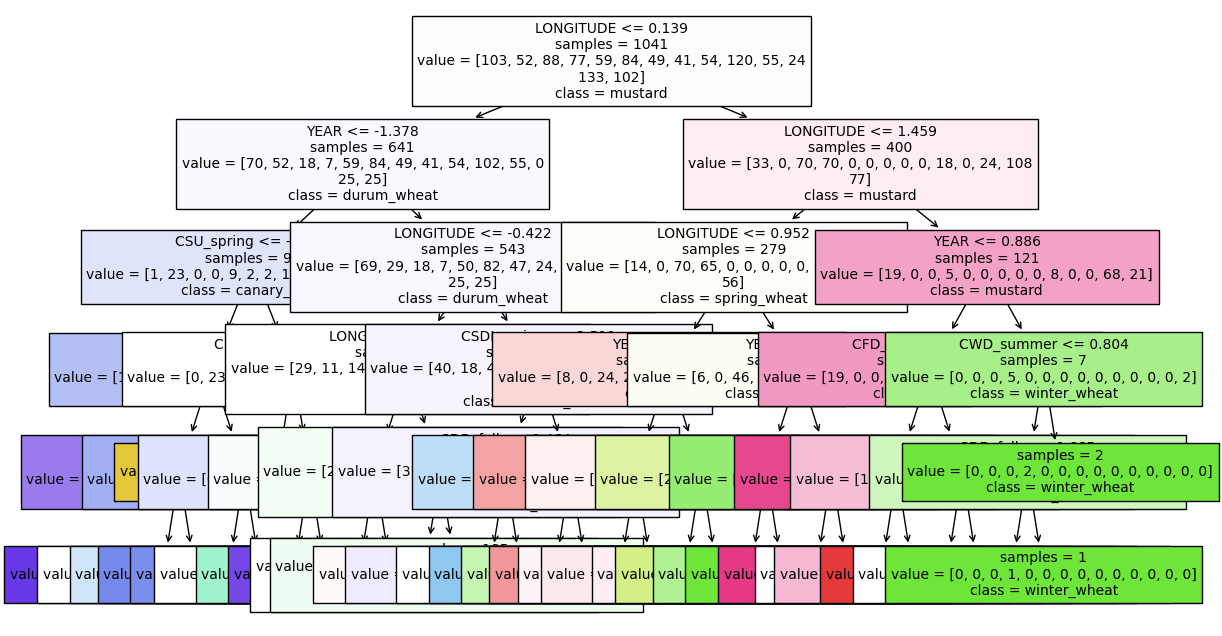

In [366]:
# Call custom_plot_tree to visualize the customized tree
from sklearn import tree
plt.figure(figsize=(12,8))
plot_tree(DecisionTree,
          feature_names=X_train.columns.tolist(),
          class_names=['barley','oats','spring_wheat','winter_wheat','corn','soybeans','canola',
                       'fall_rye','canary_seed','durum_wheat', 'flaxseed', 'lentils', 'mustard',
                       'peas'],
          filled=True,
          impurity=False,
          fontsize=10)

Random Forest Classifier

In [367]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(X_train,y_train)

predicted_values = RF.predict(X_test)

# Evaluate 
eval_model('Random Forest', y_test, predicted_values)

              precision    recall  f1-score   support

      barley       0.00      0.00      0.00        33
 canary_seed       0.33      0.23      0.27        13
      canola       0.50      0.26      0.34        27
        corn       0.12      0.21      0.16        14
 durum_wheat       0.00      0.00      0.00        10
    fall_rye       0.20      0.32      0.24        19
    flaxseed       0.09      0.08      0.09        12
     lentils       0.00      0.00      0.00         8
     mustard       0.44      0.57      0.50        14
        oats       0.06      0.11      0.08        18
        peas       0.11      0.13      0.12        15
    soybeans       0.00      0.00      0.00        10
spring_wheat       0.54      0.46      0.49        46
winter_wheat       0.18      0.23      0.20        22

    accuracy                           0.22       261
   macro avg       0.18      0.19      0.18       261
weighted avg       0.24      0.22      0.22       261

[[ 0  0  1  2  4  6  0  0

In [368]:
# Evaluate Model
score = cross_val_score(RF,features,target,cv=5)
score

array([0.22605364, 0.18007663, 0.20384615, 0.15384615, 0.10769231])

Naive Bayes

In [369]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()
NaiveBayes.fit(X_train,y_train)

predicted_values = NaiveBayes.predict(X_test)

# Evaluate 
eval_model('Naive Bayes', y_test, predicted_values)

              precision    recall  f1-score   support

      barley       0.00      0.00      0.00        33
 canary_seed       0.29      0.15      0.20        13
      canola       0.11      0.15      0.12        27
        corn       0.00      0.00      0.00        14
 durum_wheat       0.00      0.00      0.00        10
    fall_rye       1.00      0.05      0.10        19
    flaxseed       0.00      0.00      0.00        12
     lentils       0.05      0.75      0.10         8
     mustard       0.00      0.00      0.00        14
        oats       0.00      0.00      0.00        18
        peas       0.20      0.07      0.10        15
    soybeans       0.10      0.80      0.18        10
spring_wheat       0.00      0.00      0.00        46
winter_wheat       0.00      0.00      0.00        22

    accuracy                           0.08       261
   macro avg       0.12      0.14      0.06       261
weighted avg       0.12      0.08      0.05       261

[[ 0  2  3  0  2  0  0 18

c:\Users\clara\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\clara\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\clara\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\clara\miniconda3\lib\site-packages\sklearn\metrics\_clas

In [370]:
# Cross validation score (NaiveBayes)
score = cross_val_score(NaiveBayes,features,target,cv=5)
score

array([0.09195402, 0.07662835, 0.14230769, 0.1       , 0.07692308])

KNN

In [371]:
from sklearn.neighbors import KNeighborsClassifier

# Building KNN model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

predicted_values = knn.predict(X_test)

# Evaluate
eval_model('KNN', y_test, predicted_values)

              precision    recall  f1-score   support

      barley       0.10      0.15      0.12        33
 canary_seed       0.17      0.31      0.22        13
      canola       0.34      0.44      0.39        27
        corn       0.27      0.29      0.28        14
 durum_wheat       0.14      0.20      0.17        10
    fall_rye       0.30      0.32      0.31        19
    flaxseed       0.10      0.08      0.09        12
     lentils       0.00      0.00      0.00         8
     mustard       0.36      0.29      0.32        14
        oats       0.09      0.11      0.10        18
        peas       0.25      0.13      0.17        15
    soybeans       0.00      0.00      0.00        10
spring_wheat       0.63      0.48      0.54        46
winter_wheat       0.22      0.09      0.13        22

    accuracy                           0.25       261
   macro avg       0.21      0.21      0.20       261
weighted avg       0.27      0.25      0.25       261

[[ 5  2  6  0  3  2  2  0

In [372]:
# Cross validation score (KNN)
score = cross_val_score(knn,features,target,cv=5)
score

array([0.13793103, 0.1532567 , 0.19615385, 0.11153846, 0.11153846])

Logistic Regression

In [373]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(X_train,y_train)

predicted_values = LogReg.predict(X_test)

# Evaluate
eval_model('Logistic Regression', y_test, predicted_values)

              precision    recall  f1-score   support

      barley       0.25      0.09      0.13        33
 canary_seed       0.38      0.46      0.41        13
      canola       0.30      0.26      0.28        27
        corn       0.25      0.36      0.29        14
 durum_wheat       0.14      0.20      0.17        10
    fall_rye       0.14      0.11      0.12        19
    flaxseed       0.11      0.08      0.10        12
     lentils       0.15      0.25      0.19         8
     mustard       0.41      0.79      0.54        14
        oats       0.18      0.39      0.25        18
        peas       0.00      0.00      0.00        15
    soybeans       0.00      0.00      0.00        10
spring_wheat       0.52      0.52      0.52        46
winter_wheat       0.29      0.27      0.28        22

    accuracy                           0.29       261
   macro avg       0.22      0.27      0.23       261
weighted avg       0.27      0.29      0.27       261

[[ 3  0  2  1  1  4  2  1

In [374]:
score = cross_val_score(LogReg,features,target,cv=5)
score

array([0.2183908 , 0.18773946, 0.25384615, 0.21153846, 0.10769231])

SVM

In [375]:
from sklearn.svm import SVC

# Build SVC Model
SVM = SVC(gamma='auto')
SVM.fit(X_train,y_train)

predicted_values = SVM.predict(X_test)

# Evaluate
eval_model('SVM', y_test, predicted_values)

              precision    recall  f1-score   support

      barley       0.29      0.06      0.10        33
 canary_seed       0.40      0.62      0.48        13
      canola       0.57      0.30      0.39        27
        corn       0.22      0.36      0.27        14
 durum_wheat       0.17      0.10      0.12        10
    fall_rye       0.26      0.32      0.29        19
    flaxseed       0.14      0.08      0.11        12
     lentils       0.33      0.25      0.29         8
     mustard       0.33      0.57      0.42        14
        oats       0.13      0.44      0.20        18
        peas       0.00      0.00      0.00        15
    soybeans       0.00      0.00      0.00        10
spring_wheat       0.52      0.54      0.53        46
winter_wheat       0.29      0.18      0.22        22

    accuracy                           0.30       261
   macro avg       0.26      0.27      0.24       261
weighted avg       0.31      0.30      0.28       261

[[ 2  0  0  2  1  3  1  1

c:\Users\clara\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\clara\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\clara\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\clara\miniconda3\lib\site-packages\sklearn\metrics\_clas

In [376]:
score = cross_val_score(SVM,features,target,cv=5)
score

array([0.22605364, 0.16475096, 0.19230769, 0.20384615, 0.10769231])

4. Model Comparison

C:\Users\clara\AppData\Local\Temp\ipykernel_31708\692061275.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = acc,y = model,palette='dark')
C:\Users\clara\AppData\Local\Temp\ipykernel_31708\692061275.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = prec,y = model,palette='dark')
C:\Users\clara\AppData\Local\Temp\ipykernel_31708\692061275.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = recall,y = model,palette='dark')
C:\Users\clara\AppData\Local\Temp\ipykernel_31708\692061275.py:25: FutureWarning: 

Passing `palette` w

<AxesSubplot: title={'center': 'F1 Score Comparison'}, xlabel='F1 score', ylabel='Algorithm'>

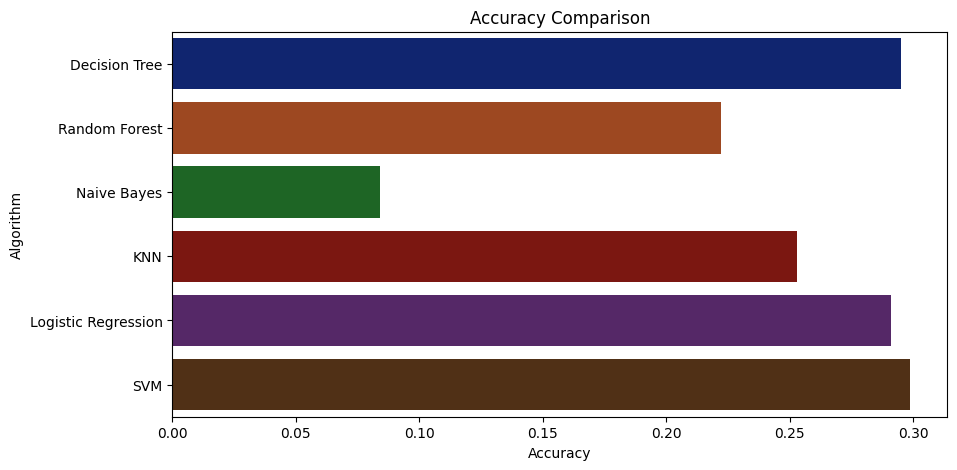

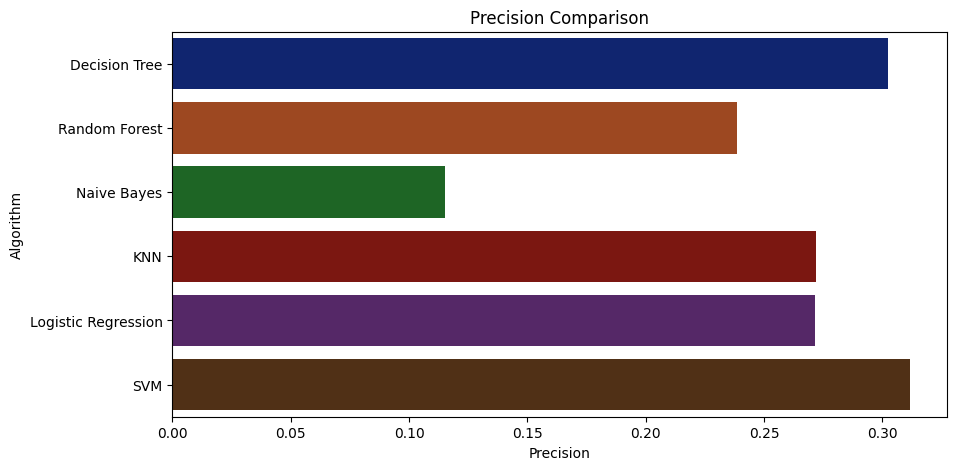

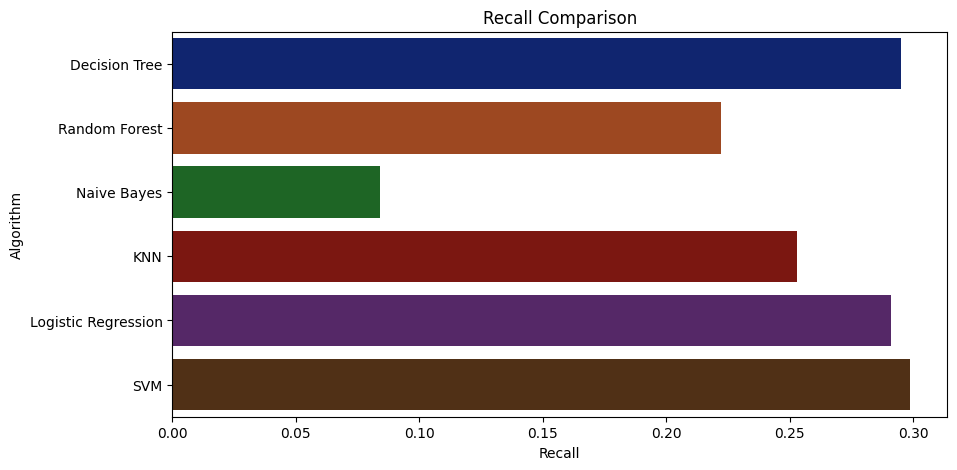

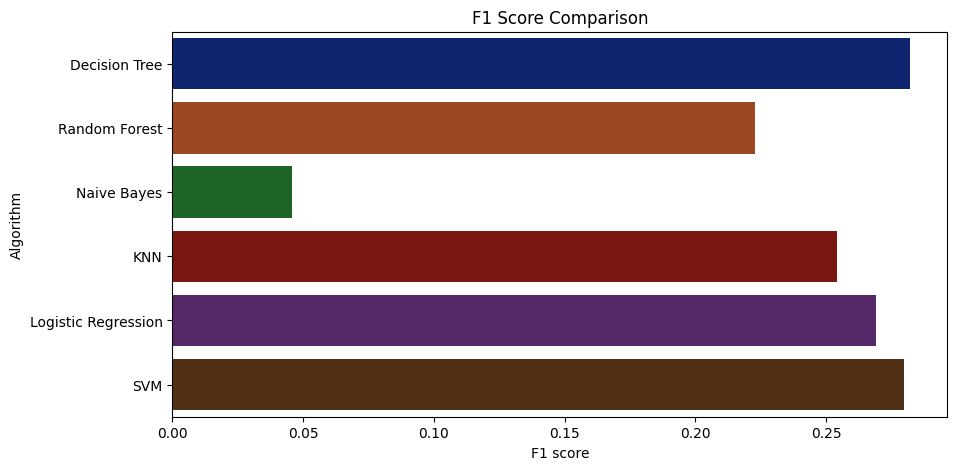

In [377]:
import seaborn as sns

plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

plt.figure(figsize=[10,5],dpi = 100)
plt.title('Precision Comparison')
plt.xlabel('Precision')
plt.ylabel('Algorithm')
sns.barplot(x = prec,y = model,palette='dark')

plt.figure(figsize=[10,5],dpi = 100)
plt.title('Recall Comparison')
plt.xlabel('Recall')
plt.ylabel('Algorithm')
sns.barplot(x = recall,y = model,palette='dark')

plt.figure(figsize=[10,5],dpi = 100)
plt.title('F1 Score Comparison')
plt.xlabel('F1 score')
plt.ylabel('Algorithm')
sns.barplot(x = f1,y = model,palette='dark')

5. Model Optimization

In [378]:
# TBU